In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
iris = load_iris()
X = iris.data
y = iris.target

print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [61]:
XTrain , XTest, yTrain, yTest = train_test_split(X,y,test_size=0.2,random_state=42)
XTrain , XVal, yTrain, yVal = train_test_split(XTrain,yTrain,test_size=0.25,random_state=42)


scaler = StandardScaler()
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.fit_transform(XTest)
XVal = scaler.fit_transform(XVal)


In [63]:
from tensorflow.keras import layers,models
model = models.Sequential()
model.add(layers.Dense(10,activation='relu' , input_shape=(4,))) 
model.add(layers.Dense(50,activation='relu')) 
model.add(layers.Dense(3,activation='softmax')) 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(XTrain,yTrain,epochs=100,verbose=True,validation_data =(XVal,yVal))

Epoch 1/100
3/3 [==============================] - 2s 181ms/step - loss: 1.0859 - accuracy: 0.3444 - val_loss: 1.0679 - val_accuracy: 0.2667
Epoch 2/100
3/3 [==============================] - 0s 99ms/step - loss: 1.0463 - accuracy: 0.3444 - val_loss: 1.0348 - val_accuracy: 0.2667
Epoch 3/100
3/3 [==============================] - 0s 114ms/step - loss: 1.0088 - accuracy: 0.3556 - val_loss: 1.0034 - val_accuracy: 0.2667
Epoch 4/100
3/3 [==============================] - 0s 59ms/step - loss: 0.9741 - accuracy: 0.3556 - val_loss: 0.9740 - val_accuracy: 0.2667
Epoch 5/100
3/3 [==============================] - 0s 26ms/step - loss: 0.9401 - accuracy: 0.3778 - val_loss: 0.9465 - val_accuracy: 0.4333
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.9097 - accuracy: 0.5333 - val_loss: 0.9209 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.8790 - accuracy: 0.6444 - val_loss: 0.8965 - val_accuracy: 0.6333
Epoch 8/100
3/3 [=

In [56]:
model = MLPClassifier(solver="lbfgs" , activation="relu", learning_rate="adaptive",learning_rate_init=0.005,
                      hidden_layer_sizes=(100),verbose=True,max_iter=100,early_stopping=True,random_state=42)
model.fit(XTrain,yTrain)


MLPClassifier(early_stopping=True, hidden_layer_sizes=100,
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=100,
              random_state=42, solver='lbfgs', verbose=True)

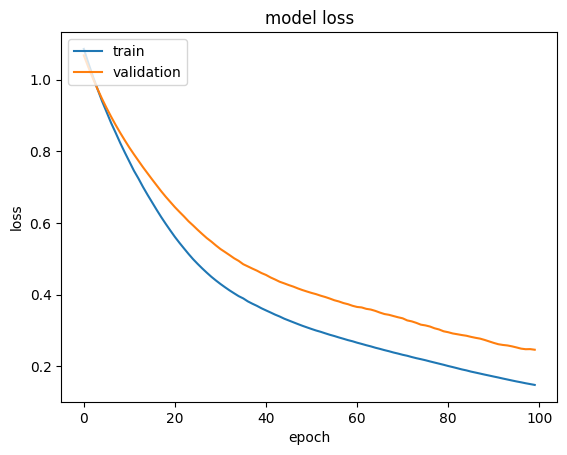

In [64]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 231ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



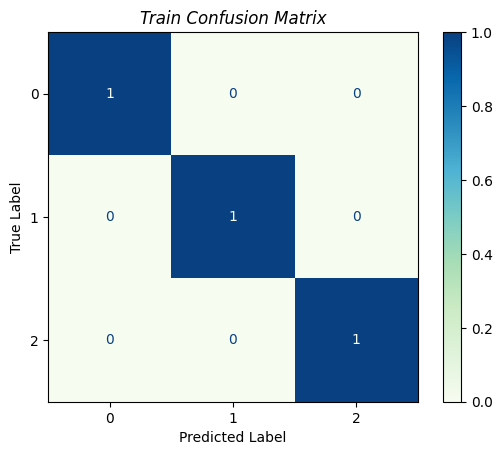

In [65]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
yTestPred = model.predict(XTest)
yTestPred=np.argmax(yTestPred,axis=1)
yTest = np.asarray(yTest)
print(classification_report(yTest,yTestPred))
cm = (confusion_matrix(yTest,yTestPred , normalize="true").round(2))
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format='g')
plt.title(f"Train Confusion Matrix",style='italic')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


